# CLIVA Geospatial Data Explorer

This notebook is a simple tool to inspect the Esri File Geodatabase (.gdb) provided by BIG (Badan Informasi Geospasial) and prepare for data ingestion into the Supabase/PostGIS database.

Objectives:
1. Install and import necessary libraries.
2. List all available data layers within the .gdb file.
3. Load a specific layer (e.g., provincial boundaries) into a GeoDataFrame.
4. Perform a basic inspection (view columns, check CRS).
5. Create a simple plot to visually verify the geometry data.

### Step 1: Install Required Libraries

First, let's make sure we have the necessary libraries. geopandas is the core tool for handling geospatial data, and fiona is its dependency for reading file formats like .gdb.

In [9]:
%pip install geopandas fiona matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Step 2: Import Libraries and Set File Path

Now, we'll import the libraries and define the path to your .gdb folder. 

⚠️ IMPORTANT: Replace the gdb_path variable below with the actual path to your .gdb folder on your computer.

In [10]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt

# --- PLEASE UPDATE THIS PATH ---
# Example for Windows: 'W:/04-Competition Files/TIC 8/data/batas_wilayah.gdb'
# Example for Linux/Mac: '/home/user/documents/data/batas_wilayah.gdb'
gdb_path = '../raw_data/RBI10K_ADMINISTRASI_DESA_20230928.gdb' 
# ------------------------------

### Step 3: List Available Layers

A single .gdb file can contain multiple datasets, called layers. Let's list all the layers available in your file to see what we can work with.

In [11]:
try:
    available_layers = fiona.listlayers(gdb_path)
    print(f'Successfully connected to the Geodatabase.')
    print('Available layers:')
    for layer in available_layers:
        print(f'- {layer}')
except Exception as e:
    print(f'Error connecting to Geodatabase: {e}')
    print('Please ensure the path is correct and you have the necessary drivers installed.')

Successfully connected to the Geodatabase.
Available layers:
- ADMINISTRASI_AR_DESAKEL


### Step 4: Load a Specific Layer

From the list above, choose one layer to inspect. We'll load it into a GeoPandas GeoDataFrame, which is like a powerful Excel spreadsheet but for map data.

In [13]:
# --- PLEASE UPDATE THIS VARIABLE ---
# Copy one of the layer names from the output of the cell above
layer_to_load = 'ADMINISTRASI_AR_DESAKEL' # Example layer name, change if needed
# ---------------------------------

print(f'Loading layer: {layer_to_load}...')
gdf = gpd.read_file(gdb_path, layer=layer_to_load)
print('Layer loaded successfully!')

Loading layer: ADMINISTRASI_AR_DESAKEL...


w:\04-Competition Files\TIC 8\Project Repo\Backend\venv\Lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiPolygon' is converted to 'MultiPolygon Z'
  return ogr_read(
w:\04-Competition Files\TIC 8\Project Repo\Backend\venv\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts.  The processing may be really slow.  You can skip the processing by setting METHOD=SKIP.
  return ogr_read(


Layer loaded successfully!


### Step 5: Inspect the Data

Let's look at the first few rows, the column names, and the Coordinate Reference System (CRS) to understand the data's structure.

In [14]:
# Display the first 5 rows of the data
print('--- First 5 Rows ---')
display(gdf.head())

# Display information about the columns and data types
print('--- Data Info ---')
gdf.info()

# Check the Coordinate Reference System (CRS)
print(f'--- Coordinate Reference System (CRS) ---')
print(gdf.crs)

--- First 5 Rows ---


,NAMOBJ,FCODE,REMARK,METADATA,SRS_ID,KDBBPS,KDCBPS,KDCPUM,KDEBPS,KDEPUM,...,WADMKK,WADMPR,WIADKC,WIADKK,WIADPR,WIADKD,UUPP,Shape_Length,Shape_Area,geometry
0,Kanigoro,BA03070040,,TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN,SRGI 2013,None,None,34.03.15,None,34.03.15.2005,...,Gunungkidul,Daerah Istimewa Yogyakarta,None,None,None,None,Data dari Pemerintah Daerah,0.296856,0.002059,"MULTIPOLYGON Z (((110.5466 -8.12764 0, 110.546..."
1,Kemadang,BA03070040,,TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN,SRGI 2013,None,None,34.03.17,None,34.03.17.2003,...,Gunungkidul,Daerah Istimewa Yogyakarta,None,None,None,None,Data dari Pemerintah Daerah,0.197368,0.001569,"MULTIPOLYGON Z (((110.55542 -8.13465 0, 110.55..."
2,Sidoharjo,BA03070040,,TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN,SRGI 2013,None,None,34.03.07,None,34.03.07.2003,...,Gunungkidul,Daerah Istimewa Yogyakarta,None,None,None,None,Data dari Pemerintah Daerah,0.238744,0.001323,"MULTIPOLYGON Z (((110.60462 -8.14807 0, 110.60..."
3,Tepus,BA03070040,,TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN,SRGI 2013,None,None,34.03.07,None,34.03.07.2004,...,Gunungkidul,Daerah Istimewa Yogyakarta,None,None,None,None,Data dari Pemerintah Daerah,0.288152,0.002316,"MULTIPOLYGON Z (((110.6684 -8.12851 0, 110.668..."
4,Balong,BA03070040,,TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN,SRGI 2013,None,None,34.03.16,None,34.03.16.2001,...,Gunungkidul,Daerah Istimewa Yogyakarta,None,None,None,None,Data dari Pemerintah Daerah,0.188517,0.000866,"MULTIPOLYGON Z (((110.70343 -8.12886 0, 110.70..."


--- Data Info ---
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 83486 entries, 0 to 83485
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   NAMOBJ        83486 non-null  object  
 1   FCODE         83486 non-null  object  
 2   REMARK        82980 non-null  object  
 3   METADATA      83486 non-null  object  
 4   SRS_ID        83486 non-null  object  
 5   KDBBPS        0 non-null      object  
 6   KDCBPS        0 non-null      object  
 7   KDCPUM        83486 non-null  object  
 8   KDEBPS        0 non-null      object  
 9   KDEPUM        83486 non-null  object  
 10  KDPBPS        0 non-null      object  
 11  KDPKAB        83486 non-null  object  
 12  KDPPUM        83486 non-null  object  
 13  LUASWH        83486 non-null  float64 
 14  TIPADM        83399 non-null  float64 
 15  WADMKC        83486 non-null  object  
 16  WADMKD        83486 non-null  object  
 17  WADMKK        83486 non-

### Step 6: Visualize the Geometries

Finally, let's create a simple plot to make sure the geometries loaded correctly. This gives us a quick visual confirmation that we're working with valid map data.

Generating a plot of the geometries...


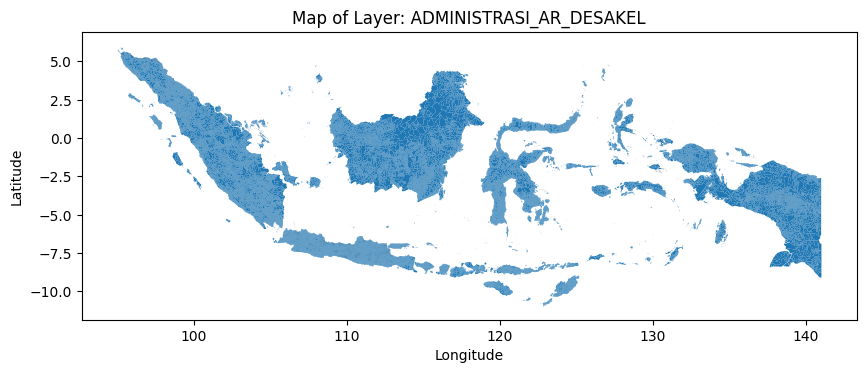

In [15]:
print('Generating a plot of the geometries...')

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the GeoDataFrame
gdf.plot(ax=ax)

# Customize and show the plot
ax.set_title(f'Map of Layer: {layer_to_load}')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()